**Published on 28th February, 2025 by Nwawuisi Rejoice, Mmesomachukwu.**

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from the Excel file
file_path = 'C:/Users/Nwawuisi Rejoice/Downloads/sales data.xlsx'
df = pd.read_excel(file_path, sheet_name='cleaned sales file')

In [3]:
df.describe

<bound method NDFrame.describe of            date  year     month  customer_age customer_gender         country  \
0    2016-05-21  2016       May            40               M          France   
1    2016-05-21  2016       May            40               M          France   
2    2016-06-06  2016      June            40               M          France   
3    2016-06-06  2016      June            40               M          France   
4    2015-03-06  2015     March            40               M          France   
...         ...   ...       ...           ...             ...             ...   
2568 2016-01-05  2016   January            28               M  United Kingdom   
2569 2016-01-07  2016   January            28               M  United Kingdom   
2570 2016-02-20  2016  February            28               M  United Kingdom   
2571 2016-02-24  2016  February            28               M  United Kingdom   
2572 2016-02-19  2016  February            52               M          Fran

In [4]:
# Displaying descriptive statistics and checking for missing values
stats = df.describe(include='all')
missing_values = df.isnull().sum()

In [5]:
# Displaying the results
print(stats)
print(missing_values)

                                 date         year     month  customer_age  \
count                            2573  2573.000000      2573   2573.000000   
unique                            NaN          NaN        12           NaN   
top                               NaN          NaN  December           NaN   
freq                              NaN          NaN       270           NaN   
mean    2016-01-05 11:56:55.312864512  2015.508745       NaN     37.544112   
min               2015-01-01 00:00:00  2015.000000       NaN     17.000000   
25%               2015-10-10 00:00:00  2015.000000       NaN     30.000000   
50%               2016-01-04 00:00:00  2016.000000       NaN     37.000000   
75%               2016-04-14 00:00:00  2016.000000       NaN     43.000000   
max               2016-07-31 00:00:00  2016.000000       NaN     71.000000   
std                               NaN     0.500021       NaN     10.210846   

       customer_gender        country       state product_categ

In [6]:
# Converting the 'date' column to datetime format for time series analysis

df['date'] = pd.to_datetime(df['date'])

In [7]:
# Grouping by date to get daily revenue
revenue_over_time = df.groupby('date')['revenue'].sum().reset_index()

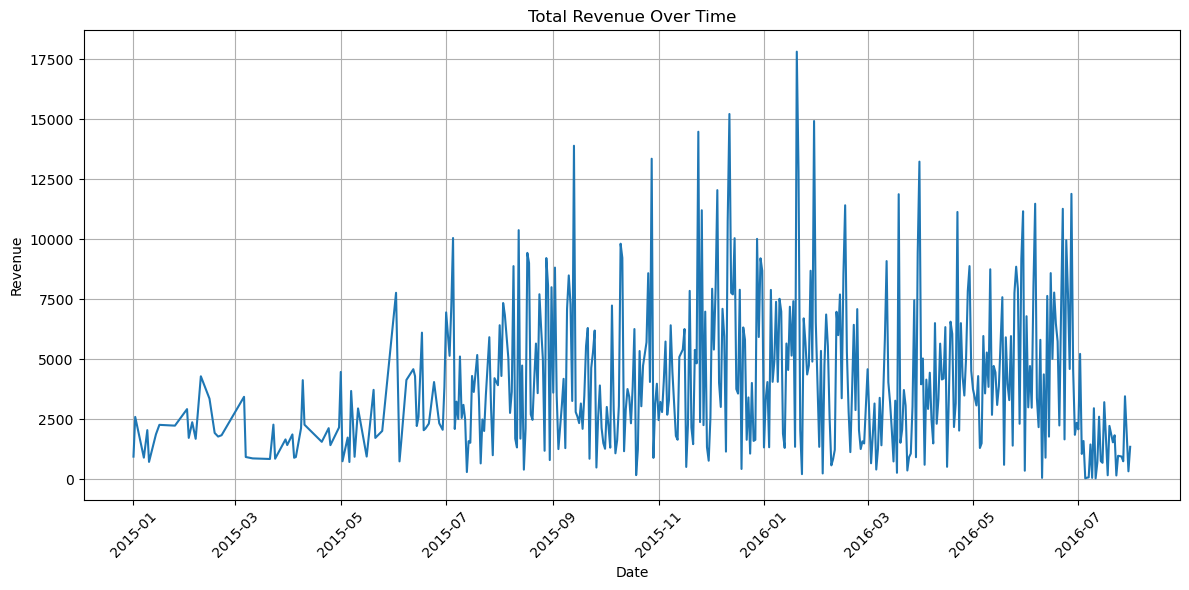

In [8]:
# Plotting the revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_over_time, x='date', y='revenue')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
# Identifying outliers using the IQR method for relevant numerical columns
# Calculating Q1 (25th percentile) and Q3 (75th percentile)

Q1 = df[['unit_cost', 'unit_price', 'cost', 'revenue']].quantile(0.25)
Q3 = df[['unit_cost', 'unit_price', 'cost', 'revenue']].quantile(0.75)
IQR = Q3 - Q1

In [11]:
# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
# Identifying outliers
outliers = df[(df[['unit_cost', 'unit_price', 'cost', 'revenue']] < lower_bound) | (df[['unit_cost', 'unit_price', 'cost', 'revenue']] > upper_bound)]

In [13]:
# Displaying the outliers
outliers_summary = outliers[['unit_cost', 'unit_price', 'cost', 'revenue']].describe()
print(outliers_summary)

         unit_cost   unit_price         cost      revenue
count   134.000000   150.000000   361.000000   186.000000
mean   2175.835821  2208.603333  2300.501385  2683.161290
std     324.779166   502.425794   132.668554   331.143875
min    1300.000000  1391.500000  2040.000000  2326.000000
25%    2071.000000  1775.500000  2295.000000  2451.000000
50%    2295.000000  2207.500000  2320.000000  2606.000000
75%    2320.000000  2510.750000  2384.000000  2797.000000
max    3120.000000  3887.000000  3600.000000  4923.000000


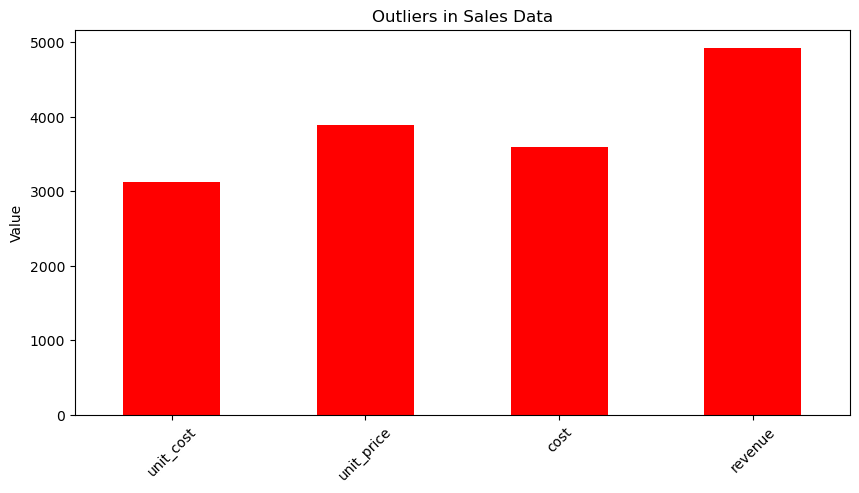

In [14]:
# Plotting a bar chart to show the outliers
plt.figure(figsize=(10,5))
outliers_summary.loc['max'].plot(kind='bar', color='red')
plt.title('Outliers in Sales Data')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Removing outliers from the dataset
# Creating a mask for non-outlier values
non_outliers_mask = ~((df[['unit_cost', 'unit_price', 'cost', 'revenue']] < lower_bound) | 
                      (df[['unit_cost', 'unit_price', 'cost', 'revenue']] > upper_bound)).any(axis=1)

In [16]:
# Filtering the dataframe to keep only non-outlier rows
cleaned_df = df[non_outliers_mask]

In [17]:
# Displaying the shape of the original and cleaned dataframes
original_shape = df.shape
cleaned_shape = cleaned_df.shape
print('Original shape:', original_shape)
print('Cleaned shape:', cleaned_shape)

Original shape: (2573, 13)
Cleaned shape: (2178, 13)


In [18]:
# Checking if outliers were removed
df_cleaned = df.drop(outliers.index)
outliers_removed_summary = df_cleaned[['unit_cost', 'unit_price', 'cost', 'revenue']].describe()

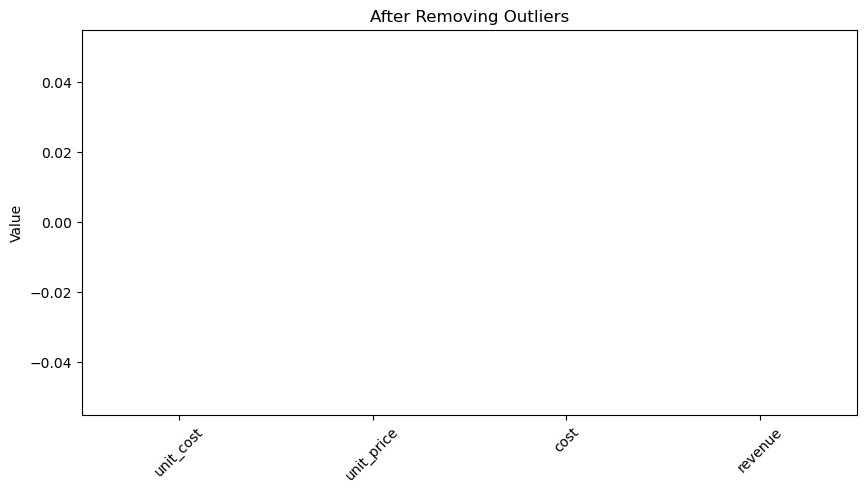

In [19]:
plt.figure(figsize=(10,5))
outliers_removed_summary.loc['max'].plot(kind='bar', color='green')
plt.title('After Removing Outliers')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Displaying summary statistics of the cleaned dataset
cleaned_summary = cleaned_df.describe()
print(cleaned_summary)

                                date         year  customer_age    unit_cost  \
count                           2178  2178.000000   2178.000000  2178.000000   
mean   2016-01-14 12:42:18.842975232  2015.530762     37.388889   210.368384   
min              2015-01-01 00:00:00  2015.000000     17.000000     0.670000   
25%              2015-10-21 00:00:00  2015.000000     30.000000    37.000000   
50%              2016-01-11 00:00:00  2016.000000     36.000000   112.500000   
75%              2016-04-21 00:00:00  2016.000000     43.000000   300.000000   
max              2016-07-31 00:00:00  2016.000000     71.000000  1250.000000   
std                              NaN     0.499167     10.281692   239.713678   

        unit_price         cost      revenue  
count  2178.000000  2178.000000  2178.000000  
mean    244.147062   354.958678   411.836088  
min       0.670000     2.000000     2.000000  
25%      45.000000    70.000000    86.000000  
50%     134.585000   198.000000   232.500000

In [21]:
# Checking the cleaned sales data to ensure the Date column is present and correctly formatted
print(cleaned_df.head())
print(cleaned_df.columns)

        date  year     month  customer_age customer_gender country    state  \
0 2016-05-21  2016       May            40               M  France  Yveline   
1 2016-05-21  2016       May            40               M  France  Yveline   
3 2016-06-06  2016      June            40               M  France  Yveline   
8 2015-11-27  2015  November            40               M  France  Yveline   
9 2015-11-27  2015  November            40               M  France  Yveline   

  product_category       sub_category  unit_cost  unit_price  cost  revenue  
0      Accessories  Bottles and Cages      50.00       68.00    50       68  
1         Clothing             Gloves     330.50      468.00   661      936  
3      Accessories            Helmets     280.00      306.00   560      612  
8            Bikes     Mountain Bikes     565.00      692.00   565      692  
9      Accessories  Bottles and Cages      26.67       32.33    80       97  
Index(['date', 'year', 'month', 'customer_age', 'customer

In [22]:
# Converting the 'date' column to datetime format for proper plotting
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

C:\Users\Nwawuisi Rejoice\AppData\Local\Temp\ipykernel_5632\1331412110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])


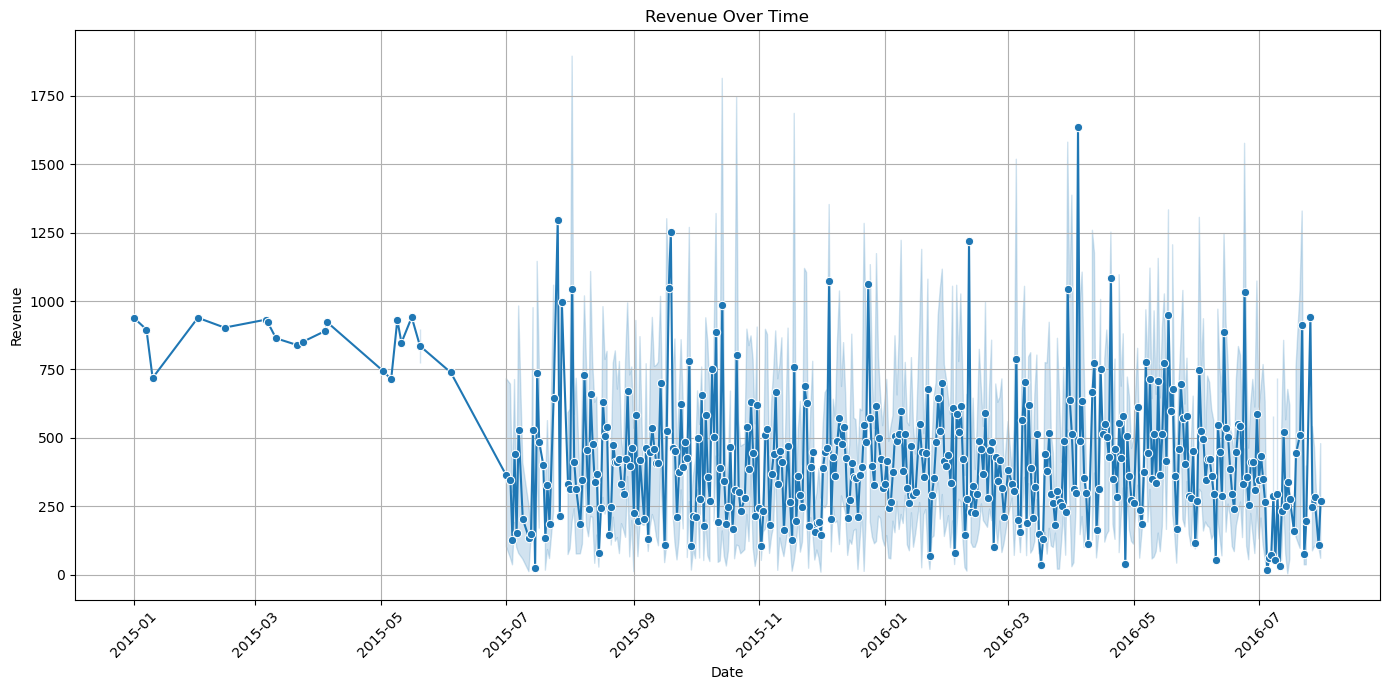

In [23]:
# Plotting revenue over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_df, x='date', y='revenue', marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

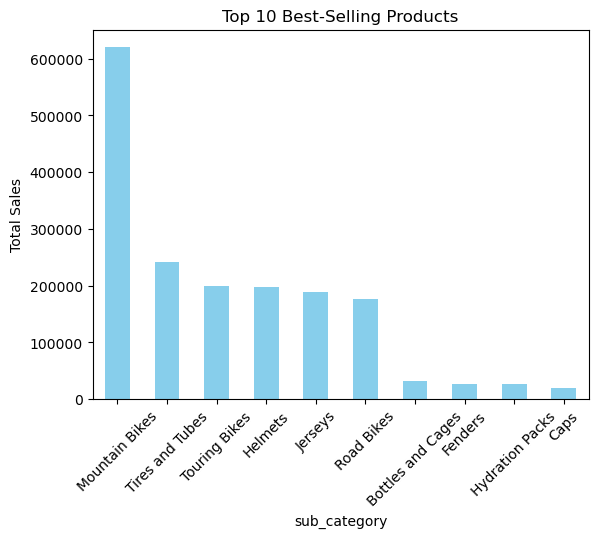

In [24]:
# Top-selling products
top_products = df.groupby('sub_category')['revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

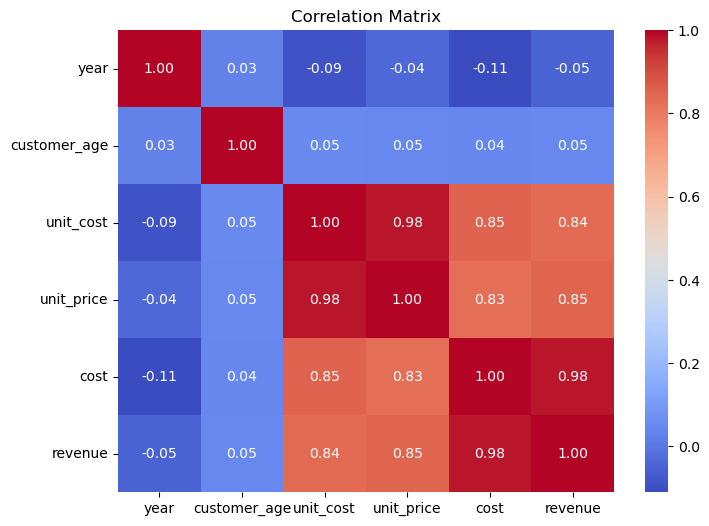

In [25]:
# Correlation analysis
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

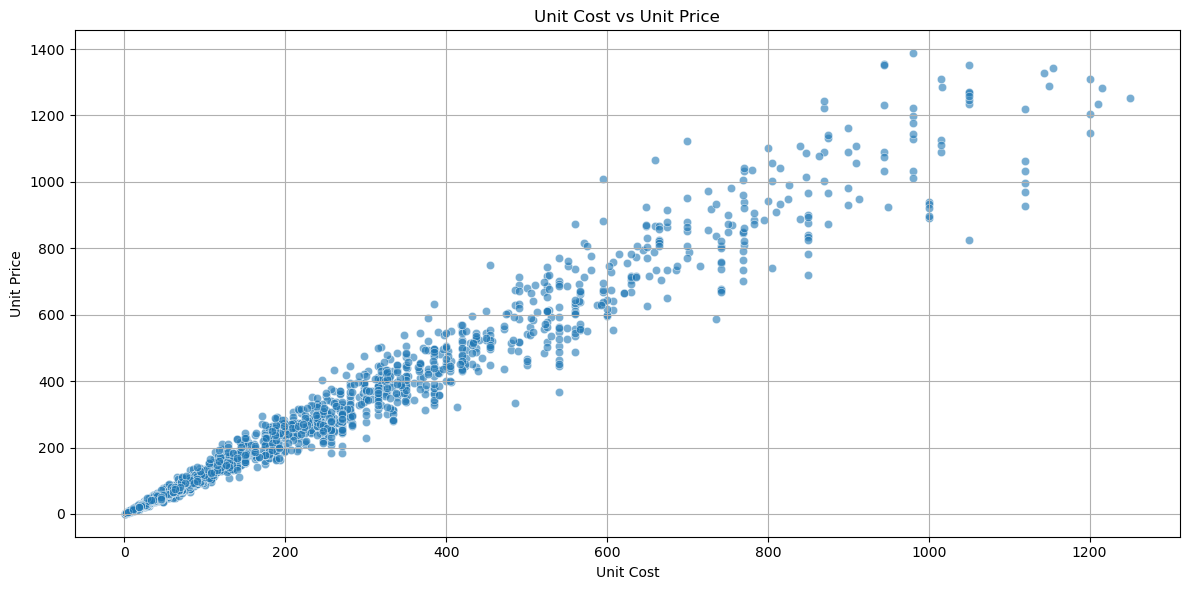

In [27]:
# Plotting unit cost vs unit price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df, x='unit_cost', y='unit_price', alpha=0.6)
plt.title('Unit Cost vs Unit Price')
plt.xlabel('Unit Cost')
plt.ylabel('Unit Price')
plt.grid()
plt.tight_layout()
plt.show()

In [28]:
# Defining features and target variable using cleaned_df
features = ['unit_cost', 'unit_price', 'cost']  # Excluding 'revenue' from features
X = cleaned_df[features]
y = cleaned_df['revenue']

In [29]:
# Displaying the head of the features and target variable
print(X.head())
print(y.head())

   unit_cost  unit_price  cost
0      50.00       68.00    50
1     330.50      468.00   661
3     280.00      306.00   560
8     565.00      692.00   565
9      26.67       32.33    80
0     68
1    936
3    612
8    692
9     97
Name: revenue, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Displaying the shapes of the resulting datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1742, 3)
X_test shape: (436, 3)
y_train shape: (1742,)
y_test shape: (436,)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Initializing the linear regression model
model = LinearRegression()

In [35]:
# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
# Displaying the evaluation metrics
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 1325.423664325767
R^2 Score: 0.9932630882771489


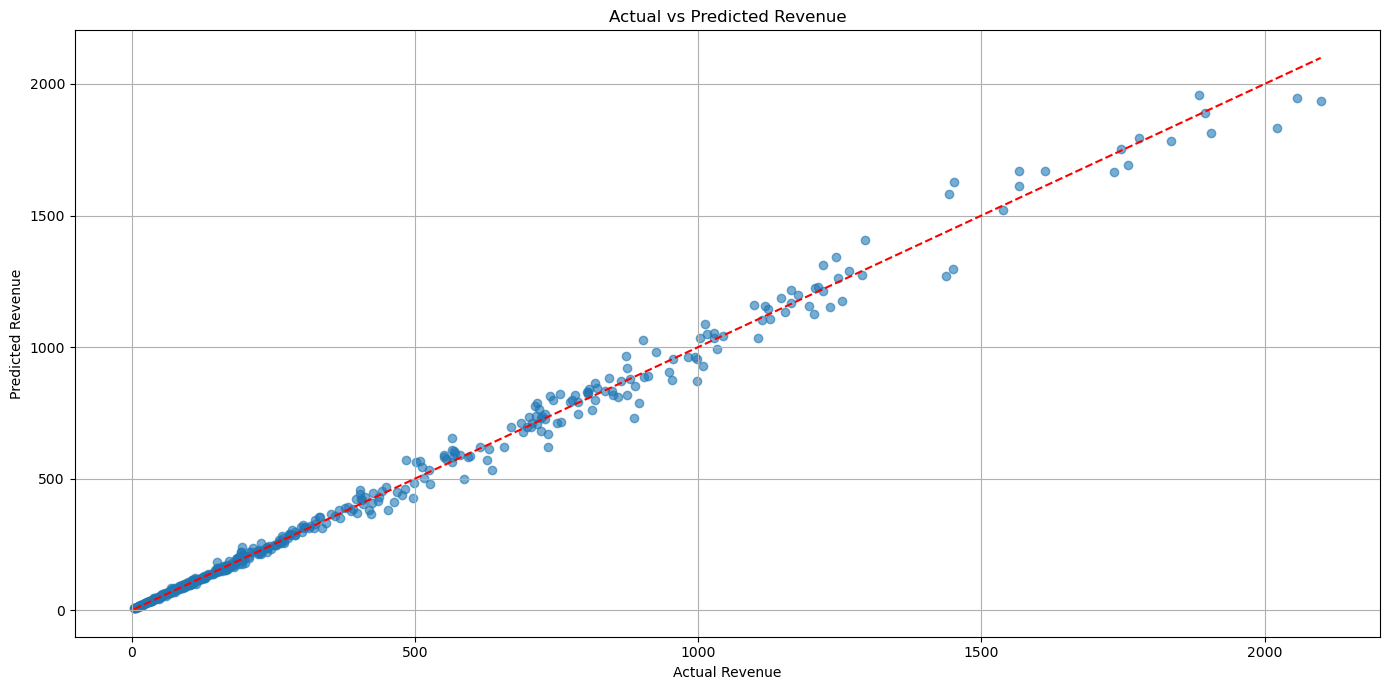

In [39]:
# Plotting actual vs predicted revenue
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect prediction
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid()
plt.tight_layout()
plt.show()

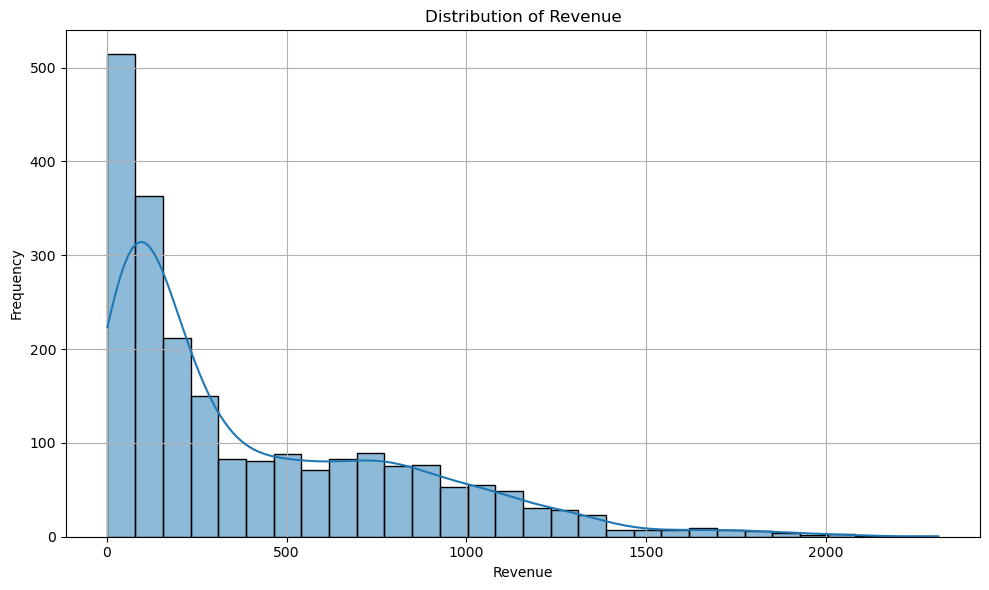

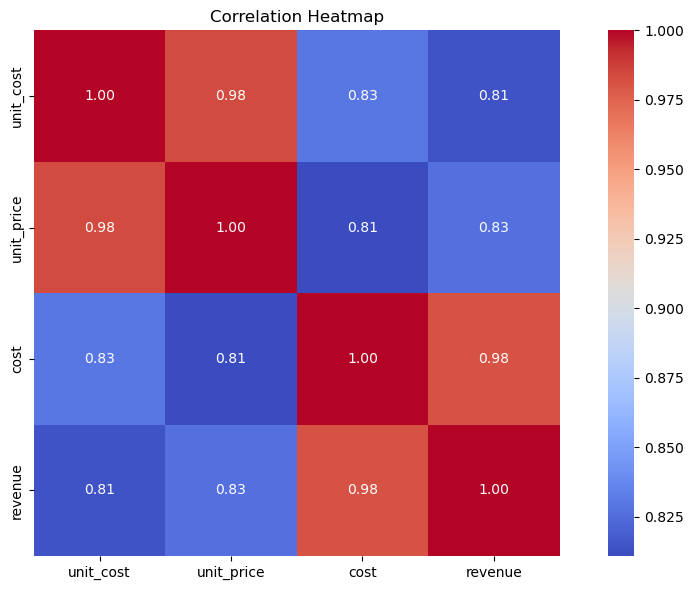

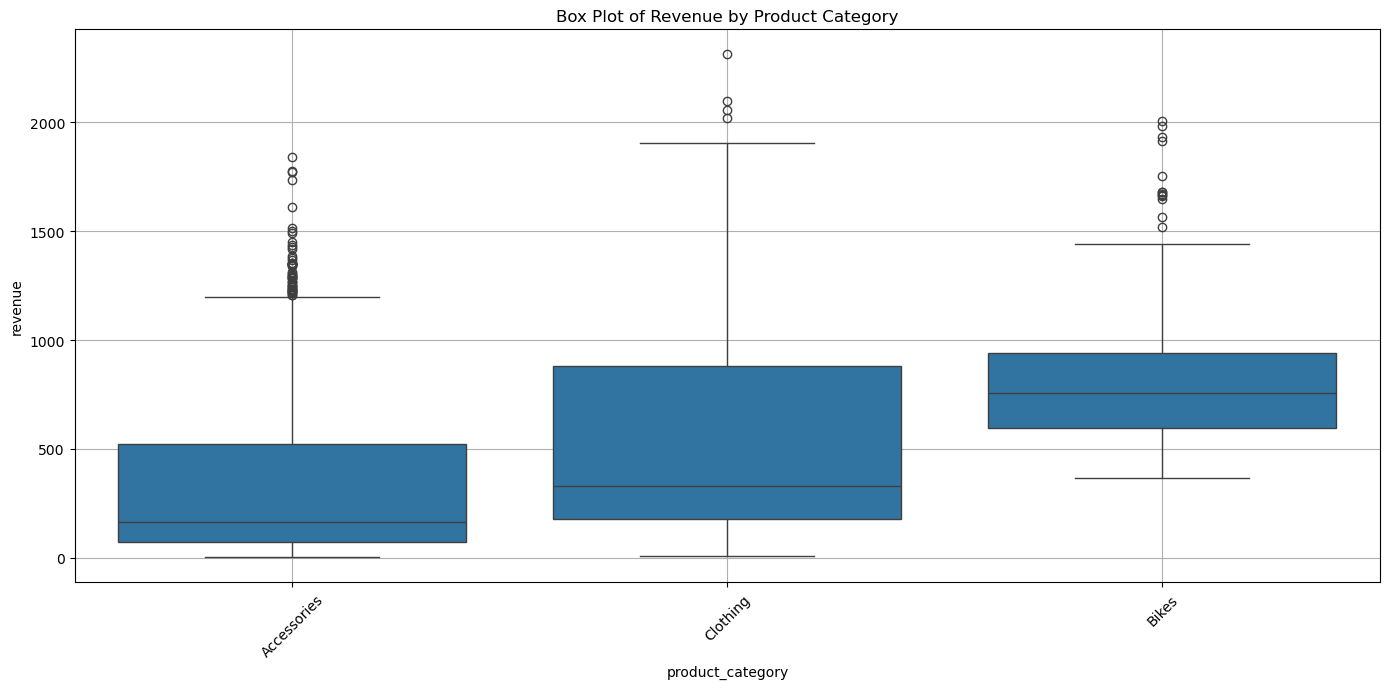

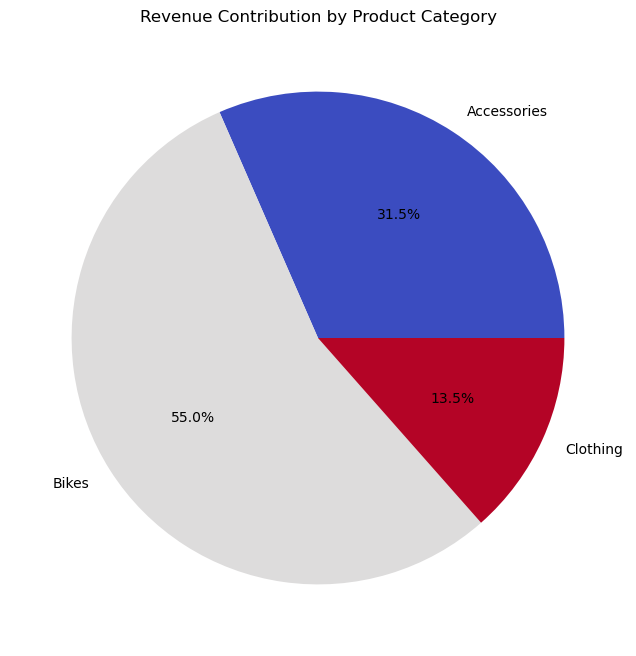

In [42]:
# 1. Distribution of Revenue
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['revenue'], bins=30, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = cleaned_df[features + ['revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 3. Box Plot of Revenue by Product Category
plt.figure(figsize=(14, 7))
sns.boxplot(data=cleaned_df, x='product_category', y='revenue')
plt.title('Box Plot of Revenue by Product Category')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 4. Revenue by Product Category (Pie Chart)
plt.figure(figsize=(8,8))
df.groupby('product_category')['revenue'].sum().plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm')
plt.title('Revenue Contribution by Product Category')
plt.ylabel('')
plt.show()

<Figure size 1200x800 with 0 Axes>

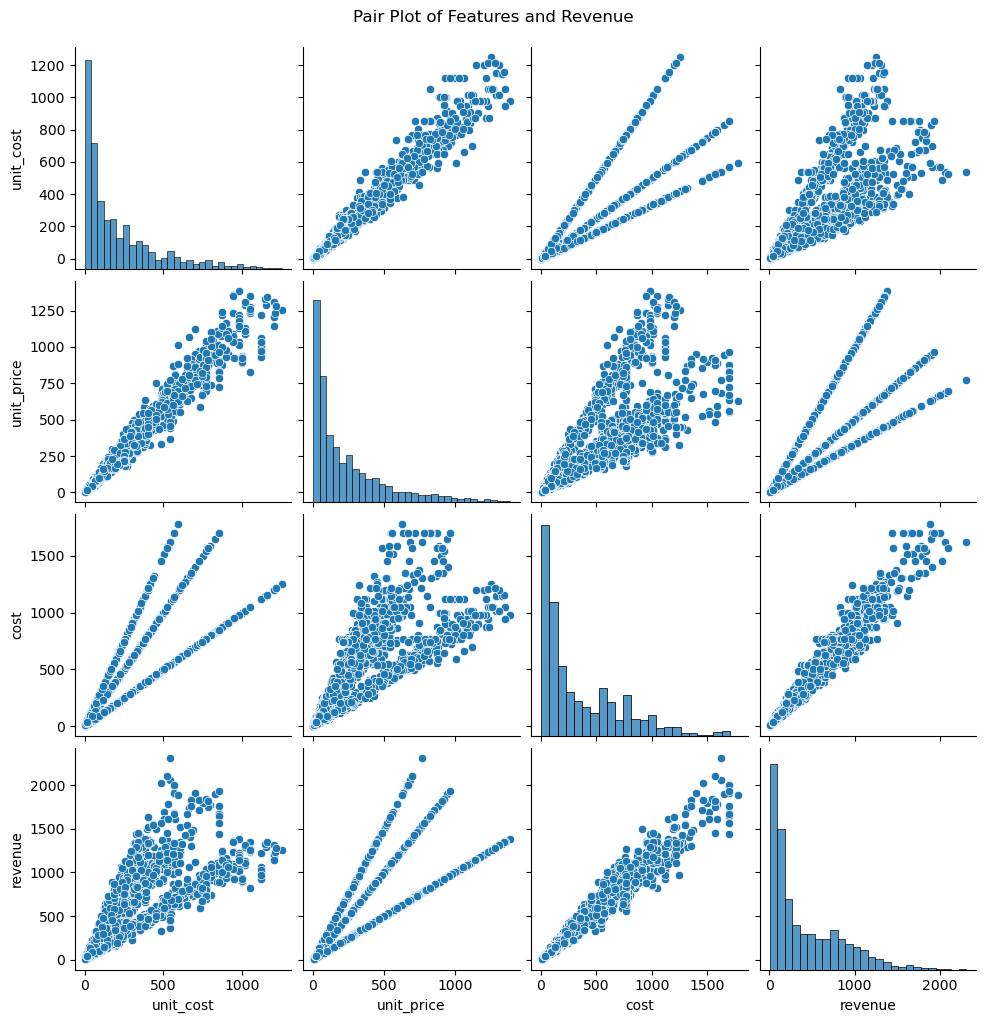

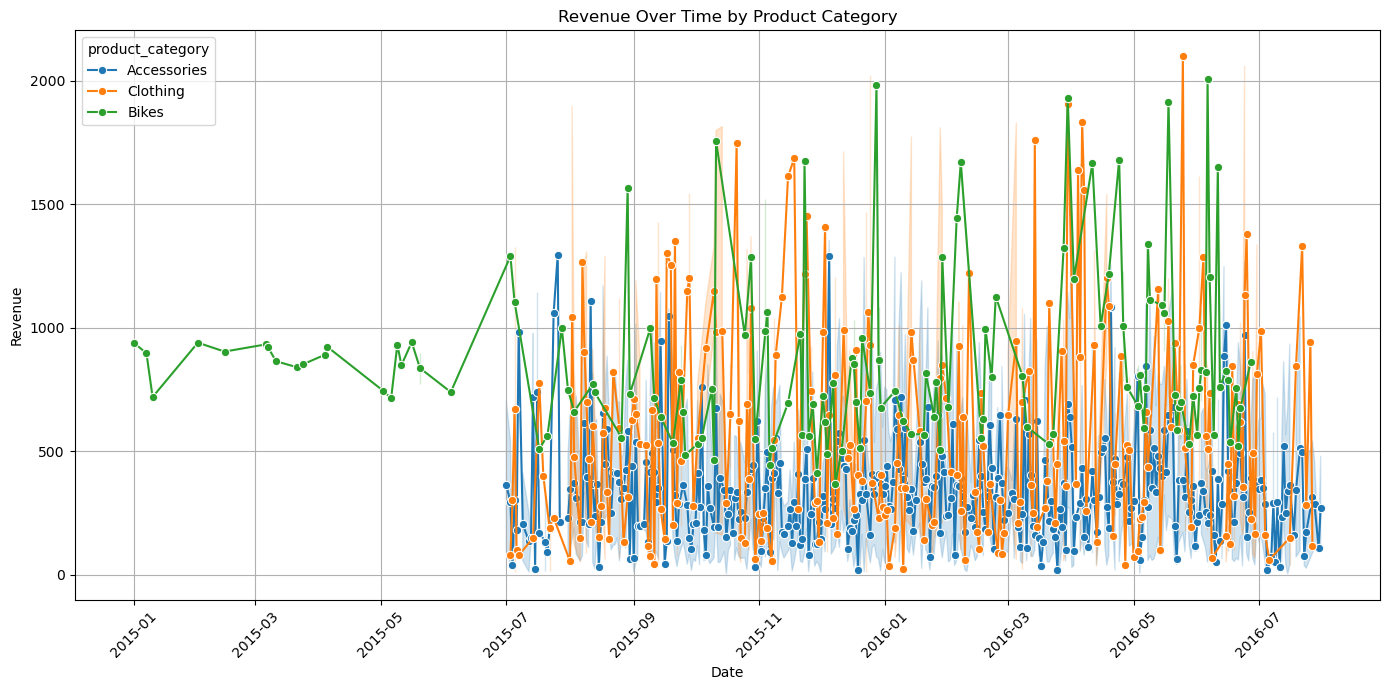

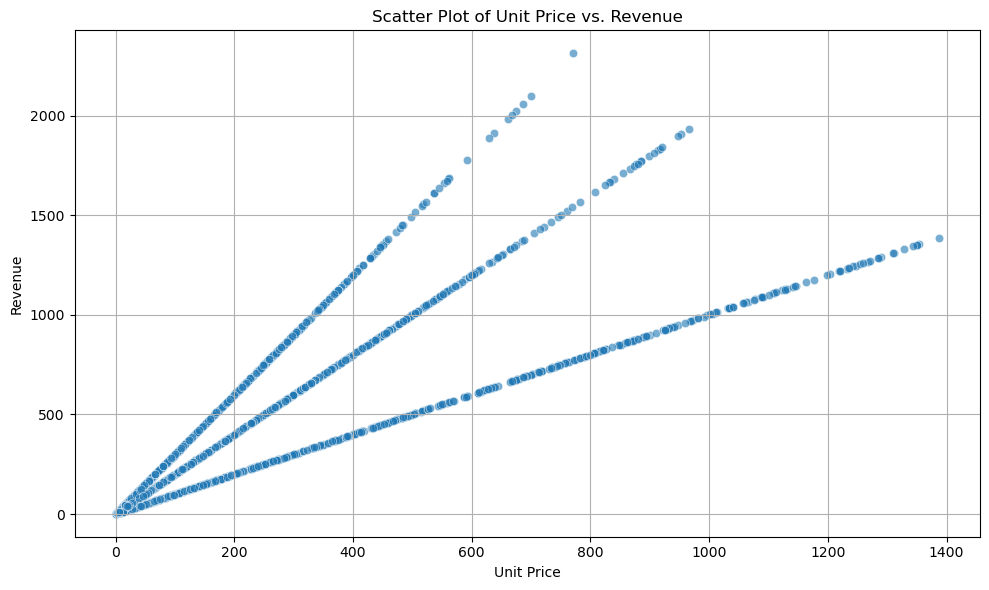

In [44]:
# Visualized Revenue Trends and Relationships

# 1. Pair Plot
plt.figure(figsize=(12, 8))
sns.pairplot(cleaned_df[features + ['revenue']])
plt.suptitle('Pair Plot of Features and Revenue', y=1.02)
plt.show()

# 2. Revenue Over Time by Product Category
plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_df, x='date', y='revenue', hue='product_category', marker='o')
plt.title('Revenue Over Time by Product Category')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 3. Scatter Plot of Unit Price vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='unit_price', y='revenue', alpha=0.6)
plt.title('Scatter Plot of Unit Price vs. Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Revenue')
plt.grid()
plt.tight_layout()
plt.show()

In [45]:
import numpy as np

# Getting the coefficients of the linear regression model
importance = model.coef_

In [46]:
# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df['Importance'] = np.abs(feature_importance_df['Importance'])  # Taking absolute values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [47]:
# Displaying the feature importance
print(feature_importance_df)

      Feature  Importance
0   unit_cost    1.629884
1  unit_price    1.420277
2        cost    1.141900


C:\Users\Nwawuisi Rejoice\AppData\Local\Temp\ipykernel_5632\3727542088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


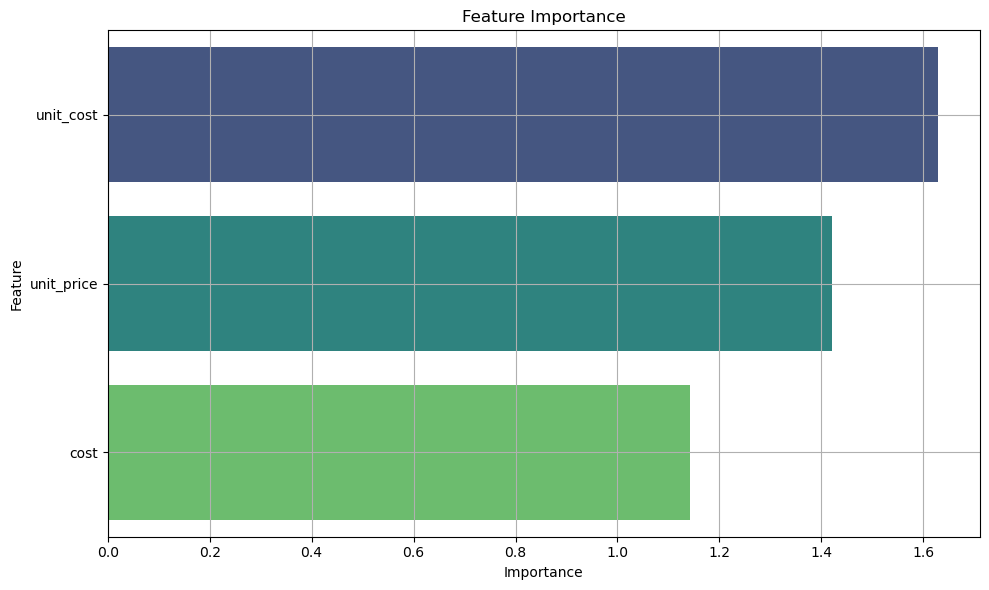

In [48]:
# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.tight_layout()
plt.show()

In [49]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

In [50]:
# Displaying the cross-validated RMSE scores
print('Cross-Validated RMSE Scores:', cv_rmse)
print('Mean Cross-Validated RMSE:', cv_rmse.mean())

Cross-Validated RMSE Scores: [36.42240544 33.24951698 26.03749047 34.70010043 37.59557542]
Mean Cross-Validated RMSE: 33.601017748790035


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid for tuning 
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [55]:
# Performing Grid Search with cross-validation
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [56]:
# Displaying the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

In [57]:
print('Best Parameters:', best_params)
print('Best Cross-Validated RMSE:', best_score)

Best Parameters: {'copy_X': True, 'fit_intercept': True}
Best Cross-Validated RMSE: 33.84552309741814


In [58]:
# Finalizing the model with the best parameters
final_model = LinearRegression(**best_params)
final_model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Evaluating the model on the test set
test_predictions = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

In [60]:
print('Final RMSE on Test Set:', final_rmse)

Final RMSE on Test Set: 36.406368458358585


In [62]:
# Save cleaned data
df.to_csv('cleaned_sales_data.csv', index=False)

In [63]:
print("Analysis complete. Cleaned data saved as 'cleaned_sales_data.csv'.")

Analysis complete. Cleaned data saved as 'cleaned_sales_data.csv'.
